# Correlation study for Temporal data

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style="whitegrid")
#sns.set(rc={'figure.figsize':(10,10)})
import matplotlib
#matplotlib.use('agg')
#matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [32]:
def lemma_maker(x, y):
    #print(lemmatizer(x,y)[0])
    return lemmatizer(x,y)[0]

In [33]:
br_to_us=pd.read_excel("Book.xlsx",skiprows=[0])
br_to_us_dict=dict(zip(br_to_us.UK.tolist(),br_to_us.US.tolist()))
spelling_replacement={'modifier':br_to_us_dict,'head':br_to_us_dict}

In [34]:
features_decades = pd.read_csv("/data/dharp/compounding/datasets/Dist_Features.csv", sep = "\t")
features_decades.set_index(["modifier", "head"], inplace = True)
features_decades.head()

1800_local_mi  1810_local_mi  1820_local_mi  \
modifier head                                                         
a_noun   anti_noun           0.001475       0.002999       0.002421   
         archive_noun        0.001475       0.002999       0.002421   
         b_noun              0.001475       0.003994       0.003293   
         bachelor_noun       0.001475       0.002999       0.002421   
         backward_noun       0.001475       0.002999       0.002421   

                        1830_local_mi  1840_local_mi  1850_local_mi  \
modifier head                                                         
a_noun   anti_noun           0.001450       0.002305       0.001750   
         archive_noun        0.001450       0.002305       0.001750   
         b_noun              0.002441       0.003645       0.003276   
         bachelor_noun       0.001450       0.002305       0.001750   
         backward_noun       0.001450       0.002305       0.001750   

                        1860_local_mi  1870_local_mi  1880_local_mi  \
modifier head                                                         
a_noun   anti_noun           0.001795       0.002143       0.001503   
         archive_noun        0.001795       0.002143       0.001503   
         b_noun              0.003655       0.004354       0.003704   
         bachelor_noun       0.001795       0.002143       0.001503   
         backward_noun       0.001795       0.002143       0.001503   

                        1890_local_mi  ...  1910_sim_with_modifier  \
modifier head                          ...                           
a_noun   anti_noun           0.000800  ...                0.000000   
         archive_noun        0.000800  ...                0.000000   
         b_noun              0.003546  ...                0.663953   
         bachelor_noun       0.000800  ...                0.000000   
         backward_noun       0.000800  ...                0.000000   

                        1920_sim_with_modifier  1930_sim_with_modifier  \
modifier head                                                            
a_noun   anti_noun                    0.000000                0.000000   
         archive_noun                 0.000000                0.000000   
         b_noun                       0.677382                0.669797   
         bachelor_noun                0.000000                0.000000   
         backward_noun                0.000000                0.000000   

                        1940_sim_with_modifier  1950_sim_with_modifier  \
modifier head                                                            
a_noun   anti_noun                    0.000000                0.000000   
         archive_noun                 0.000000                0.000000   
         b_noun                       0.656647                0.572634   
         bachelor_noun                0.000000                0.000000   
         backward_noun                0.000000                0.000000   

                        1960_sim_with_modifier  1970_sim_with_modifier  \
modifier head                                                            
a_noun   anti_noun                    0.000000                0.000000   
         archive_noun                 0.040404                0.045660   
         b_noun                       0.484829                0.363207   
         bachelor_noun                0.000000                0.000000   
         backward_noun                0.000000                0.000000   

                        1980_sim_with_modifier  1990_sim_with_modifier  \
modifier head                                                            
a_noun   anti_noun                    0.000000                0.136877   
         archive_noun                 0.015840                0.009595   
         b_noun                       0.148975                0.132585   
         bachelor_noun                0.000000                0.000000   
         backward_noun                

In [35]:
reddy11_study=pd.read_csv("/data/dharp/compounding/datasets/ijcnlp_compositionality_data/MeanAndDeviations.clean.txt",sep="\t")
#print(reddy11_study.columns)
reddy11_study.columns=['compound','to_divide']
reddy11_study['modifier_mean'],reddy11_study['modifier_std'],reddy11_study['head_mean'],reddy11_study['head_std'],reddy11_study['compound_mean'],reddy11_study['compound_std'],_=reddy11_study.to_divide.str.split(" ",7).str
reddy11_study['modifier'],reddy11_study['head']=reddy11_study['compound'].str.split(" ",2).str
reddy11_study.modifier=reddy11_study.modifier.str[:-2]
reddy11_study['head']=reddy11_study['head'].str[:-2]
reddy11_study.drop(['compound','to_divide'],axis=1,inplace=True)
reddy11_study['modifier']=np.vectorize(lemma_maker)(reddy11_study['modifier'],'noun')
reddy11_study['head']=np.vectorize(lemma_maker)(reddy11_study['head'],'noun')
reddy11_study.replace(spelling_replacement,inplace=True)
reddy11_study['modifier']=reddy11_study['modifier']+"_noun"
reddy11_study['head']=reddy11_study['head']+"_noun"
reddy11_study=reddy11_study.apply(pd.to_numeric, errors='ignore')
#reddy11_study.set_index(['modifier','head'],inplace=True)
reddy11_study.info()
reddy11_study.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
modifier_mean    90 non-null float64
modifier_std     90 non-null float64
head_mean        90 non-null float64
head_std         90 non-null float64
compound_mean    90 non-null float64
compound_std     90 non-null float64
modifier         90 non-null object
head             90 non-null object
dtypes: float64(6), object(2)
memory usage: 5.7+ KB


,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,modifier,head
0,3.866667,1.117537,4.866667,0.339935,4.250000,0.871165,end_noun,user_noun
1,1.607143,1.654848,1.892857,1.496169,1.703704,1.717337,firing_noun,line_noun
2,2.821429,1.964935,4.862069,0.344828,3.827586,1.233693,game_noun,plan_noun
3,4.766667,0.422953,4.862069,0.344828,4.800000,0.476095,application_noun,form_noun
4,0.600000,0.800000,4.586207,1.099129,1.310345,1.020596,snail_noun,mail_noun


In [36]:
merge_df=reddy11_study.merge(features_decades.reset_index(),on=['modifier','head'],how='inner')
merge_df.set_index(["modifier", "head"], inplace = True)
merge_df.info()
merge_df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78 entries, (end_noun, user_noun) to (bank_noun, account_noun)
Columns: 132 entries, modifier_mean to 2000_sim_with_modifier
dtypes: float64(132)
memory usage: 81.9+ KB


,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800_local_mi,1810_local_mi,1820_local_mi,1830_local_mi,...,1910_sim_with_modifier,1920_sim_with_modifier,1930_sim_with_modifier,1940_sim_with_modifier,1950_sim_with_modifier,1960_sim_with_modifier,1970_sim_with_modifier,1980_sim_with_modifier,1990_sim_with_modifier,2000_sim_with_modifier
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_noun,user_noun,3.866667,1.117537,4.866667,0.339935,4.250000,0.871165,0.001475,0.002999,0.002421,0.00145,...,0.000000,0.000000,0.000000,0.000000,0.458542,0.568473,0.542191,0.513664,0.490777,0.465367
firing_noun,line_noun,1.607143,1.654848,1.892857,1.496169,1.703704,1.717337,0.001475,0.002999,0.002421,0.00145,...,0.039911,0.102790,0.035117,0.029947,0.022442,0.025111,0.037736,0.032476,0.027583,0.025672
game_noun,plan_noun,2.821429,1.964935,4.862069,0.344828,3.827586,1.233693,0.001475,0.002999,0.002421,0.00145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.146909,0.189427,0.211465,0.194438,0.245117
application_noun,form_noun,4.766667,0.422953,4.862069,0.344828,4.800000,0.476095,0.001475,0.002999,0.002421,0.00145,...,0.520395,0.488524,0.425361,0.428391,0.375451,0.325316,0.352539,0.307542,0.293822,0.303618
web_noun,site_noun,2.678571,1.691440,3.933333,1.181336,3.785714,1.205853,0.001475,0.002999,0.002421,0.00145,...,0.000000,0.045876,0.000000,0.000000,0.000000,0.138569,0.160723,0.201672,0.229830,0.193739


In [37]:
merge_df.to_csv('CompoundAware_DecadeAware.csv',sep='\t')

In [10]:
merge_df.columns

Index(['modifier_mean', 'modifier_std', 'head_mean', 'head_std',
       'compound_mean', 'compound_std', '1800_local_mi', '1810_local_mi',
       '1820_local_mi', '1830_local_mi',
       ...
       '1910_sim_with_modifier', '1920_sim_with_modifier',
       '1930_sim_with_modifier', '1940_sim_with_modifier',
       '1950_sim_with_modifier', '1960_sim_with_modifier',
       '1970_sim_with_modifier', '1980_sim_with_modifier',
       '1990_sim_with_modifier', '2000_sim_with_modifier'],
      dtype='object', length=132)

In [13]:
lmi_cols = ['modifier_mean','head_mean','compound_mean']+[col for col in merge_df.columns if 'local_mi' in col]

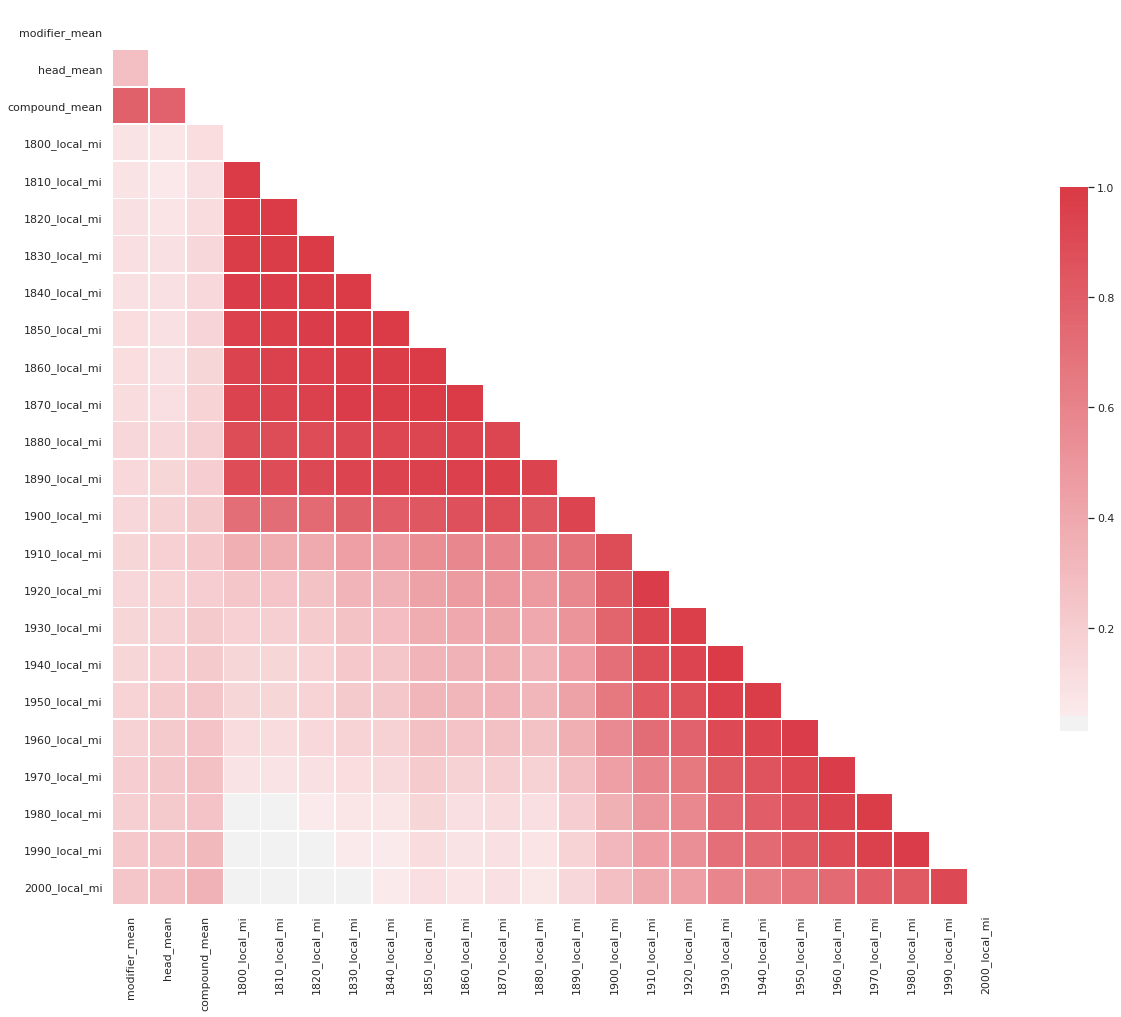

In [14]:
corr=merge_df[lmi_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

( We need to perhaps analyse this above graph as nothing major strikes out of it)

In [28]:
log_cols = ['modifier_mean','head_mean','compound_mean']+[col for col in merge_df.columns if 'log_ratio' in col]
ppmi_cols = ['modifier_mean','head_mean','compound_mean']+[col for col in merge_df.columns if 'ppmi' in col]
sim_bw_cols=['modifier_mean','head_mean','compound_mean']+[col for col in merge_df.columns if 'sim_bw' in col]
sim_head_cols=['modifier_mean','head_mean','compound_mean']+[col for col in merge_df.columns if 'with_head' in col]
sim_modifier_cols=['modifier_mean','head_mean','compound_mean']+[col for col in merge_df.columns if 'with_modifier' in col]

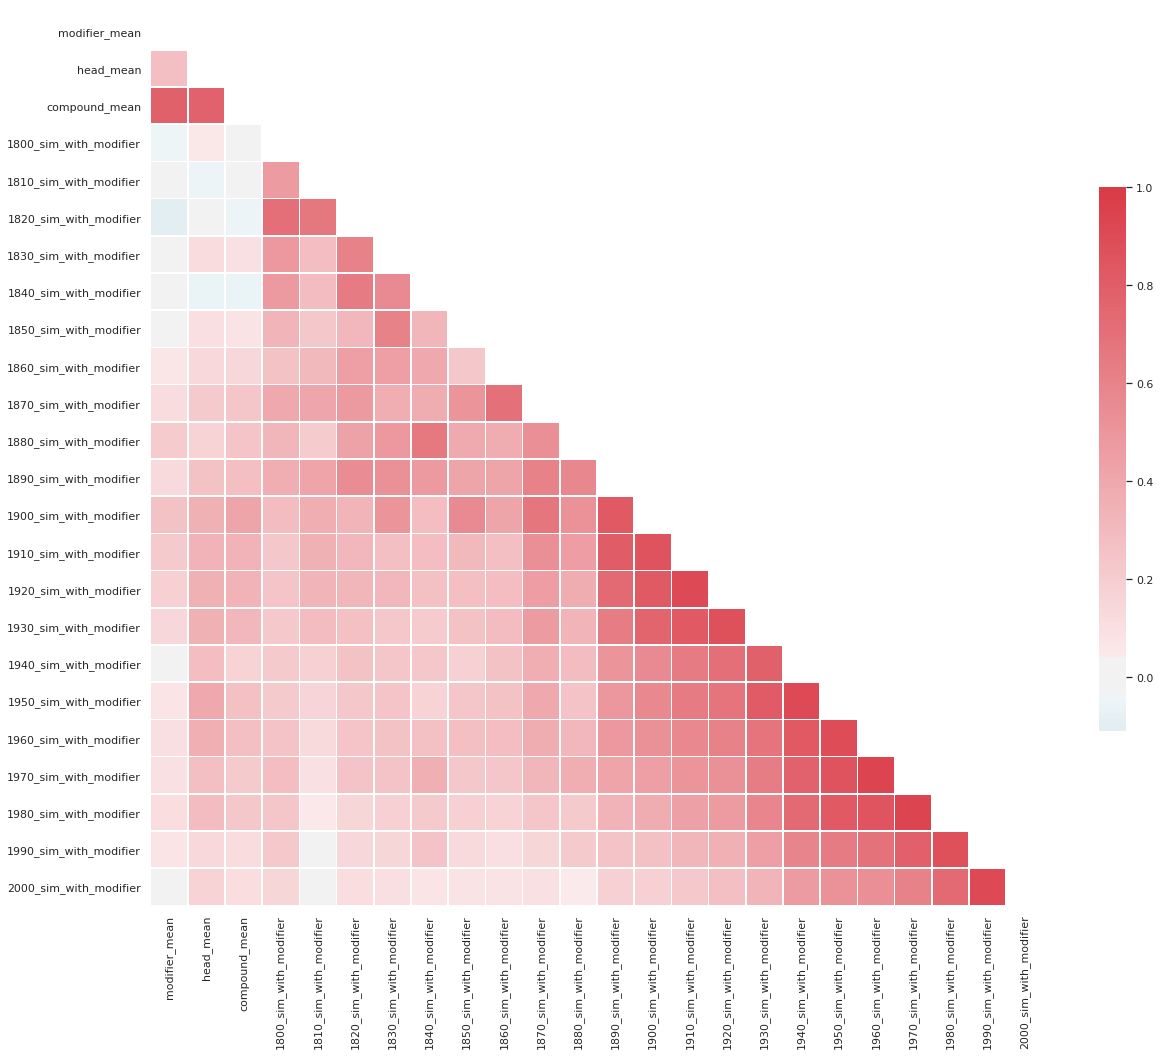

In [30]:
corr=merge_df[sim_modifier_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
corr

,modifier_mean,head_mean,compound_mean,1800_sim_bw_constituents,1810_sim_bw_constituents,1820_sim_bw_constituents,1830_sim_bw_constituents,1840_sim_bw_constituents,1850_sim_bw_constituents,1860_sim_bw_constituents,...,1910_sim_bw_constituents,1920_sim_bw_constituents,1930_sim_bw_constituents,1940_sim_bw_constituents,1950_sim_bw_constituents,1960_sim_bw_constituents,1970_sim_bw_constituents,1980_sim_bw_constituents,1990_sim_bw_constituents,2000_sim_bw_constituents
modifier_mean,1.000000,0.279315,0.785671,-0.020887,-0.003656,-0.043727,-0.076556,-0.098839,-0.146256,0.044827,...,0.254897,0.280274,0.369032,0.265042,0.299445,0.311979,0.295458,0.432684,0.401957,0.292474
head_mean,0.279315,1.000000,0.774040,0.025510,-0.017973,-0.027249,0.054745,0.009343,0.053610,0.107411,...,0.316714,0.357867,0.353682,0.374378,0.460535,0.463075,0.441184,0.539328,0.457373,0.359521
compound_mean,0.785671,0.774040,1.000000,0.063287,0.004548,-0.002980,0.003799,-0.050327,-0.051958,0.123250,...,0.362582,0.397060,0.456548,0.387386,0.468478,0.487999,0.448827,0.599065,0.522700,0.378955
1800_sim_bw_constituents,-0.020887,0.025510,0.063287,1.000000,0.479204,0.608839,0.421248,0.389000,0.158111,0.267732,...,0.251446,0.068213,0.031246,0.017756,0.160965,0.176215,0.121315,0.059362,0.011194,-0.042514
1810_sim_bw_constituents,-0.003656,-0.017973,0.004548,0.479204,1.000000,0.766754,0.443261,0.398069,0.168879,0.320981,...,0.319122,0.314111,0.207606,0.163777,0.168680,0.105740,0.046617,0.006813,-0.017035,-0.029993
1820_sim_bw_constituents,-0.043727,-0.027249,-0.002980,0.608839,0.766754,1.000000,0.742128,0.686210,0.294280,0.531994,...,0.267512,0.215126,0.128420,0.119626,0.121044,0.107177,0.116933,0.014481,-0.005966,-0.000210
1830_sim_bw_constituents,-0.076556,0.054745,0.003799,0.421248,0.443261,0.742128,1.000000,0.906749,0.340634,0.577626,...,0.283520,0.337194,0.181332,0.269667,0.239894,0.268557,0.341673,0.126733,0.089655,0.072762
1840_sim_bw_constituents,-0.098839,0.009343,-0.050327,0.389000,0.398069,0.686210,0.906749,1.000000,0.400485,0.640641,...,0.291509,0.332795,0.184217,0.277552,0.255205,0.300486,0.367456,0.110712,0.068581,0.056711
1850_sim_bw_constituents,-0.146256,0.053610,-0.051958,0.158111,0.168879,0.294280,0.340634,0.400485,1.000000,0.328530,...,0.420439,0.311604,0.200709,0.211911,0.141064,0.221097,0.207464,0.121221,0.146182,0.150551
1860_sim_bw_constituents,0.044827,0.107411,0.123250,0.267732,0.320981,0.531994,0.577626,0.640641,0.328530,1.000000,...,0.314552,0.267939,0.180278,0.177322,0.197035,0.224250,0.214348,0.232099,0.175463,0.177333
